# Team Hulk Project

For our project, we looked into getting datasets on the usage of the word “Donald Trump” within social media messages. Most notably, messages from the social media platform Twitter, commonly referred to as "tweets". We focused on tweets that discuss the 45th President of the United States Donald J. Trump. We used the Twitter API to gather data from tweets relating to the President. From there, we were able to parse through countless tweets to develop a refined dataset for our analysis. In this in depth analysis of tweets mentioning Donald Trump, we will seek answers in these two distinct topics: 

Do different types of hashtags trend throughout the day depending on real world events relating to Trump? ([Jason Tang](https://github.com/jtang073))

Are tweeters who mention Donald Trump in their tweets different or similar types of people? ([Kramer Sanders](https://github.com/ksand012))

As we try to find answers, we will look into the correlation of different types of variables and see if there are any connections at all relating to these topics. To do so, we must first read in our dataset.

In [1]:
import json
tweets = []
for line in open('realData.json', 'r'):
    tweets.append(json.loads(line))

A total of **367,819 tweets** were collected in a 2.3GB json file. A sample of the data looked something like this: 
![](jsonSS.png)

After entering all of the data we gathered, we json_normalized our data into a pandas dataframe. There were over **400 columns of data per tweet** (over 147 million cells!), however many of them were dropped due to the columns containing nullified NaN data or due to the columns pertaining to information outside the scope of our project. We utilized the df.drop method because we were not sure if there was a faster way to parse through each of the 400 normalized columns in our dataframe. In light of all this, our data cleaning looked like this:

In [2]:
#Data Cleaning
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
pd.options.mode.chained_assignment = None

from pandas.io.json import json_normalize
pd.set_option('display.max_columns', None)
jsonData = json_normalize(tweets)
jsonData = jsonData.drop(columns=["contributors", "coordinates", "display_text_range", "entities.media", "entities.symbols", "entities.urls", "extended_tweet.full_text", "extended_entities.media", "extended_tweet.display_text_range", "extended_tweet.entities.hashtags", "extended_tweet.entities.media", "extended_tweet.entities.urls", "extended_tweet.entities.symbols", "extended_tweet.entities.user_mentions", "extended_tweet.extended_entities.media"])
jsonData = jsonData.drop(columns=["favorited", "favorite_count", "filter_level", "geo", "id", "id_str", "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str"])
jsonData = jsonData.drop(columns=["place", "place.bounding_box.coordinates", "place.bounding_box.type", "place.country", "place.country_code", "place.full_name", "place.id", "place.name", "place.place_type", "place.url", "possibly_sensitive"])
jsonData = jsonData.drop(columns=["quote_count", "quoted_status.contributors", "quoted_status.coordinates", "quoted_status.created_at", "quoted_status.display_text_range", "quoted_status.entities.hashtags", "quoted_status.entities.media", "quoted_status.entities.symbols", "quoted_status.entities.urls", "quoted_status.entities.user_mentions", "quoted_status.extended_entities.media", "quoted_status.extended_tweet.display_text_range", "quoted_status.extended_tweet.entities.hashtags", "quoted_status.extended_tweet.entities.media", "quoted_status.extended_tweet.entities.symbols", "quoted_status.extended_tweet.entities.urls", "quoted_status.extended_tweet.entities.user_mentions", "quoted_status.extended_tweet.extended_entities.media", "quoted_status.extended_tweet.full_text", "quoted_status.favorite_count", "quoted_status.filter_level", "quoted_status.geo", "quoted_status.favorited", "quoted_status.id", "quoted_status.id_str", "quoted_status.in_reply_to_screen_name", "quoted_status.in_reply_to_status_id", "quoted_status.in_reply_to_status_id_str", "quoted_status.in_reply_to_user_id", "quoted_status.in_reply_to_user_id_str", "quoted_status.is_quote_status", "quoted_status.lang", "quoted_status.place", "quoted_status.possibly_sensitive", "quoted_status.quote_count", "quoted_status.reply_count", "quoted_status.retweet_count", "quoted_status.retweeted", "quoted_status.source", "quoted_status.text", "quoted_status.truncated"])
jsonData = jsonData.drop(columns=["quoted_status.user.contributors_enabled", "quoted_status.user.created_at", "quoted_status.user.default_profile", "quoted_status.user.default_profile_image", "quoted_status.user.description", "quoted_status.user.favourites_count", "quoted_status.user.follow_request_sent", "quoted_status.user.followers_count", "quoted_status.user.following", "quoted_status.user.friends_count", "quoted_status.user.geo_enabled", "quoted_status.user.id", "quoted_status.user.id_str", "quoted_status.user.is_translator", "quoted_status.user.lang", "quoted_status.user.listed_count", "quoted_status.user.location", "quoted_status.user.name", "quoted_status.user.notifications", "quoted_status.user.profile_background_color", "quoted_status.user.profile_background_image_url", "quoted_status.user.profile_background_image_url_https", "quoted_status.user.profile_background_tile", "quoted_status.user.profile_banner_url", "quoted_status.user.profile_image_url", "quoted_status.user.profile_image_url_https", "quoted_status.user.profile_link_color", "quoted_status.user.profile_sidebar_border_color", "quoted_status.user.profile_sidebar_fill_color", "quoted_status.user.profile_text_color", "quoted_status.user.profile_use_background_image", "quoted_status.user.protected", "quoted_status.user.screen_name", "quoted_status.user.statuses_count", "quoted_status.user.time_zone", "quoted_status.user.translator_type", "quoted_status.user.url", "quoted_status.user.utc_offset", "quoted_status.user.verified", "quoted_status_id", "quoted_status_id_str", "quoted_status_permalink.display", "quoted_status_permalink.url", "quoted_status_permalink.expanded"])
jsonData = jsonData.drop(columns=["reply_count", "retweet_count", "retweeted", "retweeted_status.contributors", "retweeted_status.coordinates", "retweeted_status.display_text_range", "retweeted_status.entities.hashtags", "retweeted_status.entities.media", "retweeted_status.entities.symbols", "retweeted_status.entities.urls", "retweeted_status.entities.user_mentions", "retweeted_status.extended_entities.media", "retweeted_status.extended_tweet.entities.hashtags", "retweeted_status.extended_tweet.entities.media", "retweeted_status.extended_tweet.entities.symbols", "retweeted_status.extended_tweet.entities.urls", "retweeted_status.extended_tweet.entities.user_mentions", "retweeted_status.extended_tweet.display_text_range", "retweeted_status.extended_tweet.extended_entities.media", "retweeted_status.extended_tweet.extended_entities.media", "retweeted_status.favorited", "retweeted_status.filter_level", "retweeted_status.geo", "retweeted_status.id", "retweeted_status.id_str", "retweeted_status.in_reply_to_screen_name", "retweeted_status.in_reply_to_status_id", "retweeted_status.in_reply_to_status_id_str", "retweeted_status.in_reply_to_user_id", "retweeted_status.in_reply_to_user_id_str", ])
jsonData = jsonData.drop(columns=["retweeted_status.place", "retweeted_status.place.bounding_box.coordinates", "retweeted_status.place.bounding_box.type", "retweeted_status.place.country", "retweeted_status.place.country_code", "retweeted_status.place.full_name", "retweeted_status.place.id", "retweeted_status.place.name", "retweeted_status.place.place_type", "retweeted_status.place.url", "retweeted_status.possibly_sensitive", "retweeted_status.quoted_status.contributors", "retweeted_status.quoted_status.coordinates", "retweeted_status.quoted_status.created_at", "retweeted_status.quoted_status.display_text_range", "retweeted_status.quoted_status.entities.hashtags", "retweeted_status.quoted_status.entities.media", "retweeted_status.quoted_status.entities.symbols", "retweeted_status.quoted_status.entities.urls", "retweeted_status.quoted_status.entities.user_mentions", "retweeted_status.quoted_status.extended_entities.media", "retweeted_status.quoted_status.extended_tweet.display_text_range", "retweeted_status.quoted_status.extended_tweet.entities.hashtags", "retweeted_status.quoted_status.extended_tweet.entities.media", "retweeted_status.quoted_status.extended_tweet.entities.symbols", "retweeted_status.quoted_status.extended_tweet.entities.urls", "retweeted_status.quoted_status.extended_tweet.entities.user_mentions", "retweeted_status.quoted_status.extended_tweet.extended_entities.media"])
jsonData = jsonData.drop(columns=["retweeted_status.quoted_status.extended_tweet.full_text", "retweeted_status.quoted_status.favorite_count", "retweeted_status.quoted_status.favorited", "retweeted_status.quoted_status.filter_level", "retweeted_status.quoted_status.geo", "retweeted_status.quoted_status.id", "retweeted_status.quoted_status.id_str", "retweeted_status.quoted_status.in_reply_to_screen_name", "retweeted_status.quoted_status.in_reply_to_status_id", "retweeted_status.quoted_status.in_reply_to_status_id_str", "retweeted_status.quoted_status.in_reply_to_user_id", "retweeted_status.quoted_status.in_reply_to_user_id_str", "retweeted_status.quoted_status.is_quote_status", "retweeted_status.quoted_status.lang", "retweeted_status.quoted_status.place", "retweeted_status.quoted_status.possibly_sensitive", "retweeted_status.quoted_status.quote_count", "retweeted_status.quoted_status.reply_count", "retweeted_status.quoted_status.retweeted", "retweeted_status.quoted_status.source", "retweeted_status.quoted_status.text", "retweeted_status.quoted_status.truncated", "retweeted_status.quoted_status.retweet_count"])
jsonData = jsonData.drop(columns=["retweeted_status.quoted_status.user.contributors_enabled", "retweeted_status.quoted_status.user.created_at", "retweeted_status.quoted_status.user.default_profile", "retweeted_status.quoted_status.user.default_profile_image", "retweeted_status.quoted_status.user.description", "retweeted_status.quoted_status.user.favourites_count", "retweeted_status.quoted_status.user.follow_request_sent", "retweeted_status.quoted_status.user.followers_count", "retweeted_status.quoted_status.user.following", "retweeted_status.quoted_status.user.friends_count", "retweeted_status.quoted_status.user.geo_enabled", "retweeted_status.quoted_status.user.id", "retweeted_status.quoted_status.user.id_str", "retweeted_status.quoted_status.user.is_translator", "retweeted_status.quoted_status.user.lang", "retweeted_status.quoted_status.user.listed_count", "retweeted_status.quoted_status.user.location", "retweeted_status.quoted_status.user.name", "retweeted_status.quoted_status.user.notifications"])
jsonData = jsonData.drop(columns=["retweeted_status.quoted_status.user.profile_background_color", "retweeted_status.quoted_status.user.profile_background_image_url", "retweeted_status.quoted_status.user.profile_background_image_url_https", "retweeted_status.quoted_status.user.profile_background_tile", "retweeted_status.quoted_status.user.profile_banner_url", "retweeted_status.quoted_status.user.profile_image_url", "retweeted_status.quoted_status.user.profile_image_url_https", "retweeted_status.quoted_status.user.profile_link_color", "retweeted_status.quoted_status.user.profile_sidebar_border_color", "retweeted_status.quoted_status.user.profile_sidebar_fill_color", "retweeted_status.quoted_status.user.profile_text_color", "retweeted_status.quoted_status.user.profile_use_background_image", "retweeted_status.quoted_status.user.protected", "retweeted_status.quoted_status.user.screen_name", "retweeted_status.quoted_status.user.statuses_count", "retweeted_status.quoted_status.user.time_zone", "retweeted_status.quoted_status.user.translator_type", "retweeted_status.quoted_status.user.url", "retweeted_status.quoted_status.user.utc_offset", "retweeted_status.quoted_status.user.verified", "retweeted_status.quoted_status_id", "retweeted_status.quoted_status_id_str", "retweeted_status.quoted_status_permalink.display", "retweeted_status.quoted_status_permalink.expanded", "retweeted_status.quoted_status_permalink.url"])
jsonData = jsonData.drop(columns=["retweeted_status.user.default_profile", "retweeted_status.user.profile_background_color", "retweeted_status.user.following", "retweeted_status.user.id", "retweeted_status.user.id_str", "retweeted_status.user.is_translator", "retweeted_status.user.lang", "retweeted_status.user.notifications", "retweeted_status.user.profile_background_image_url", "retweeted_status.user.profile_background_image_url_https", "retweeted_status.user.profile_background_tile", "retweeted_status.user.profile_banner_url", "retweeted_status.user.profile_image_url_https", "retweeted_status.user.profile_link_color", "retweeted_status.user.profile_sidebar_border_color", "retweeted_status.user.profile_sidebar_fill_color", "retweeted_status.user.profile_text_color", "retweeted_status.user.profile_use_background_image", "retweeted_status.user.protected", "retweeted_status.user.follow_request_sent", "retweeted_status.user.profile_image_url"])
jsonData = jsonData.drop(columns=["retweeted_status.user.time_zone", "retweeted_status.user.translator_type", "retweeted_status.user.url", "retweeted_status.user.utc_offset", "retweeted_status.user.default_profile_image", "retweeted_status.user.contributors_enabled"])
jsonData = jsonData.drop(columns=["source", "timestamp_ms", "truncated"])
jsonData = jsonData.drop(columns=["user.default_profile_image", "user.contributors_enabled", "user.id", "user.id_str", "user.is_translator", "user.following", "user.follow_request_sent", "user.lang", "user.notifications", "user.profile_text_color", "user.protected", "user.profile_background_color", "user.profile_use_background_image", "user.profile_background_image_url", "user.profile_background_image_url_https", "user.profile_background_tile", "user.profile_banner_url", "user.profile_image_url", "user.profile_image_url_https", "user.profile_link_color", "user.profile_sidebar_border_color", "user.profile_sidebar_fill_color", "user.time_zone", "user.translator_type", "user.url", "user.utc_offset"])
#For test data only -- Because some tweets will not contain ALL available columns; Depending on your dataset size, you may not have some of these columns.
jsonData = jsonData.drop(columns=["coordinates.coordinates", "coordinates.type", "geo.coordinates", "geo.type", "quoted_status.coordinates.coordinates", "quoted_status.coordinates.type", "quoted_status.geo.coordinates", "quoted_status.geo.type", "quoted_status.place.bounding_box.coordinates", "quoted_status.place.bounding_box.type", "quoted_status.place.country", "quoted_status.place.country_code", "quoted_status.place.full_name", "quoted_status.place.id", "quoted_status.place.name", "quoted_status.place.place_type", "quoted_status.place.url", "quoted_status.quoted_status_id", "quoted_status.quoted_status_id_str", "quoted_status.scopes.followers", "retweeted_status.coordinates.coordinates", "retweeted_status.coordinates.type", "retweeted_status.geo.coordinates", "retweeted_status.geo.type", "retweeted_status.quoted_status.place.bounding_box.coordinates", "retweeted_status.quoted_status.place.bounding_box.type", "retweeted_status.quoted_status.place.country", "retweeted_status.quoted_status.place.country_code", "retweeted_status.quoted_status.place.full_name", "retweeted_status.quoted_status.place.id", "retweeted_status.quoted_status.place.name", "retweeted_status.quoted_status.place.place_type", "retweeted_status.quoted_status.place.url", "retweeted_status.quoted_status.quoted_status_id", "retweeted_status.quoted_status.quoted_status_id_str", "retweeted_status.scopes.followers", "retweeted_status.withheld_in_countries", "withheld_in_countries"])

In [3]:
jsonData.head()

,created_at,entities.hashtags,entities.user_mentions,is_quote_status,lang,retweeted_status.created_at,retweeted_status.extended_tweet.full_text,retweeted_status.favorite_count,retweeted_status.is_quote_status,retweeted_status.lang,retweeted_status.quote_count,retweeted_status.reply_count,retweeted_status.retweet_count,retweeted_status.retweeted,retweeted_status.source,retweeted_status.text,retweeted_status.truncated,retweeted_status.user.created_at,retweeted_status.user.description,retweeted_status.user.favourites_count,retweeted_status.user.followers_count,retweeted_status.user.friends_count,retweeted_status.user.geo_enabled,retweeted_status.user.listed_count,retweeted_status.user.location,retweeted_status.user.name,retweeted_status.user.screen_name,retweeted_status.user.statuses_count,retweeted_status.user.verified,text,user.created_at,user.default_profile,user.description,user.favourites_count,user.followers_count,user.friends_count,user.geo_enabled,user.listed_count,user.location,user.name,user.screen_name,user.statuses_count,user.verified
0,Sun Jul 19 00:02:11 +0000 2020,[],"[{u'indices': [3, 12], u'id_str': u'14642495',...",False,en,Sat Jul 18 19:21:35 +0000 2020,NaN,37765.0,False,en,515.0,549.0,8275.0,False,"<a href=""http://twitter.com/download/iphone"" r...",Next project for @ProjectLincoln: a supercut o...,False,Sat May 03 23:30:29 +0000 2008,writer / comedian / #blockedbytrump / wrote 10...,138729.0,1923477.0,2941.0,False,4500.0,"Brooklyn, NY",Sarah Cooper,sarahcpr,37400.0,True,RT @sarahcpr: Next project for @ProjectLincoln...,Tue Mar 30 01:58:13 +0000 2010,False,Pianist/Keyboardist/Songwriter/Composer/Sound ...,2297,369,1182,True,4,Right Here,Larry Tasse,LarryTasse,10219,False
1,Sun Jul 19 00:02:12 +0000 2020,"[{u'indices': [30, 52], u'text': u'MakeAmerica...","[{u'indices': [3, 15], u'id_str': u'45676731',...",True,en,Fri Jul 17 17:43:39 +0000 2020,NaN,8985.0,True,en,39.0,383.0,2238.0,False,"<a href=""http://twitter.com/download/iphone"" r...",You got it.\n\n#MakeAmericaGreatAgain Again. h...,False,Mon Jun 08 21:31:05 +0000 2009,Director of Communications for @realDonaldTrum...,185.0,166012.0,1609.0,False,697.0,"Alexandria, VA",Tim Murtaugh - Download the Trump 2020 app today!,TimMurtaugh,4454.0,True,RT @TimMurtaugh: You got it.\n\n#MakeAmericaGr...,Thu May 07 07:20:41 +0000 2009,False,#Jesus #Trump2020 Twitter fears me. Why else w...,34461,7247,7956,False,21,None,John Dough,bpz6961,26238,False
2,Sun Jul 19 00:02:12 +0000 2020,[],"[{u'indices': [3, 14], u'id_str': u'255812611'...",False,en,Sat Jul 18 21:18:06 +0000 2020,NaN,14370.0,False,en,182.0,322.0,3308.0,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Do not believe anything Donald Trump or his ad...,False,Tue Feb 22 02:58:46 +0000 2011,#1 Internationally bestselling author of The C...,142410.0,318859.0,15423.0,False,1533.0,Repped by Shane Salerno/The Story Factory,Don Winslow,donwinslow,42163.0,True,RT @donwinslow: Do not believe anything Donald...,Tue Oct 27 19:39:02 +0000 2009,True,"DC born and raised. ""I can't believe what you ...",15593,2045,3949,False,1,"Washington, DC",Barfy,chrisjgraves,7828,False
3,Sun Jul 19 00:02:12 +0000 2020,[],[],True,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harris is the class act at Fox News!,Thu Mar 24 03:21:20 +0000 2011,True,None,2601,42,94,False,0,None,John Boldebook,ValveDoc,6202,False
4,Sun Jul 19 00:02:12 +0000 2020,[],"[{u'indices': [3, 14], u'id_str': u'1270884555...",False,en,Sat Jul 18 22:54:39 +0000 2020,As a retired Army Lieutenant Colonel who has d...,345.0,False,en,2.0,9.0,114.0,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",As a retired Army Lieutenant Colonel who has d...,True,Thu Jun 11 01:05:17 +0000 2020,He/him. Retired Army Lieutenant Colonel. Proud...,637.0,148.0,128.0,False,0.0,None,Gary Port,GaryPort19,855.0,False,RT @GaryPort19: As a retired Army Lieutenant C...,Sat Dec 27 22:22:00 +0000 2014,True,Lover of life and al

## Trending Tweets About President Trump Throughout the Day

In order to parse through the hashtags, we needed to clean up the data and make it more presentable to a reader. Here is some of the cleanup we did just to be able to parse through valid hashtags.

In [4]:
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].astype(str)
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r"\{u\'[a-z]*\':\s\[[0-9]*,\s[0-9]*\]", "") #Deletes useless words ( u'indicies': ' )
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r",\su\'[a-z]*\':\su\'", "") #Same as above BUT for indicies that comes after
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r"\}", "") #Deletes stray close curly brackets from first replace function ( } )
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r"\[\]", "") #Deletes stray "no hashtags" written as brackets ( [] ) 
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r"\'*", "") #Delets stray quote marks ( ' )
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r",\s[a-zA-Z]*", "") #Deletes multiple hashtags
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r"\[", "") #Deletes the open bracket in the beginning
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r"\]", "") #Deletes the close bracket in the end
dataHashTags = jsonData[jsonData['entities.hashtags'] != ''] #Removes blank hashtag indicator that was left from replace function
dataHashTags['entities.hashtags'].describe()

count                     24820
unique                     2869
top       TrumpThreatensAmerica
freq                       3518
Name: entities.hashtags, dtype: object

Only **24,820** out of 367,819 tweets (~6.7%) contained any kind of hashtag. We decided to dig deeper into the hashtags that trended when mentioning the words "Donald Trump". The next block counts the total amount of unique hashtags that were used when mentioning President Trump. As you can see, **#TrumpThreatensAmerica was mentioned 3518** times followed up by **#DemocratsStandTall for 2828 times**. These two hashtags made up the majority of the hashtags that were in our dataset. 

An interesting thing to note is that there is a total of 134 hashtags of \u06a9\u067e\u062a... and so on. According to Twitter's Developer API Docs, they are the result of errors most likely from the conversion between Twitter data and json format. 

In [5]:
mostUsedHashtag = dataHashTags['entities.hashtags'].value_counts()
mostUsedHashtag = mostUsedHashtag.sort_values(ascending=False) #Descending order
mostUsedHashtag

TrumpThreatensAmerica                                                                                                          3518
DemocratsStandTall                                                                                                             2828
WomenforTrump                                                                                                                   930
Trump19                                                                                                                         796
Trump                                                                                                                           724
NotMyChild                                                                                                                      420
MakeAmericaGreatAgain                                                                                                           345
NEW                                                                         

Here is a graphical representation of the information above.

An interesting thing to note in this graph is that during the Covid-19 Coronavirus pandemic, the hashtag **#COVID19 was ranked 23rd** out of the most used hashtag when mentioning "Donald Trump".

The hashtag #LinkinPark outranked #COVID19, ranking 19th overall when mentioning "Donald Trump". We were surprised by this at first and researched why the band LinkinPark was trending with the President's name, as the two entities are not commonly associated with each other. We discovered that during the data collection phase, the band LinkinPark had gone forward in the process to sue President Trump through the United States Courts due to unauthorized use of their song "In The End" in one of his campaign advertisements.

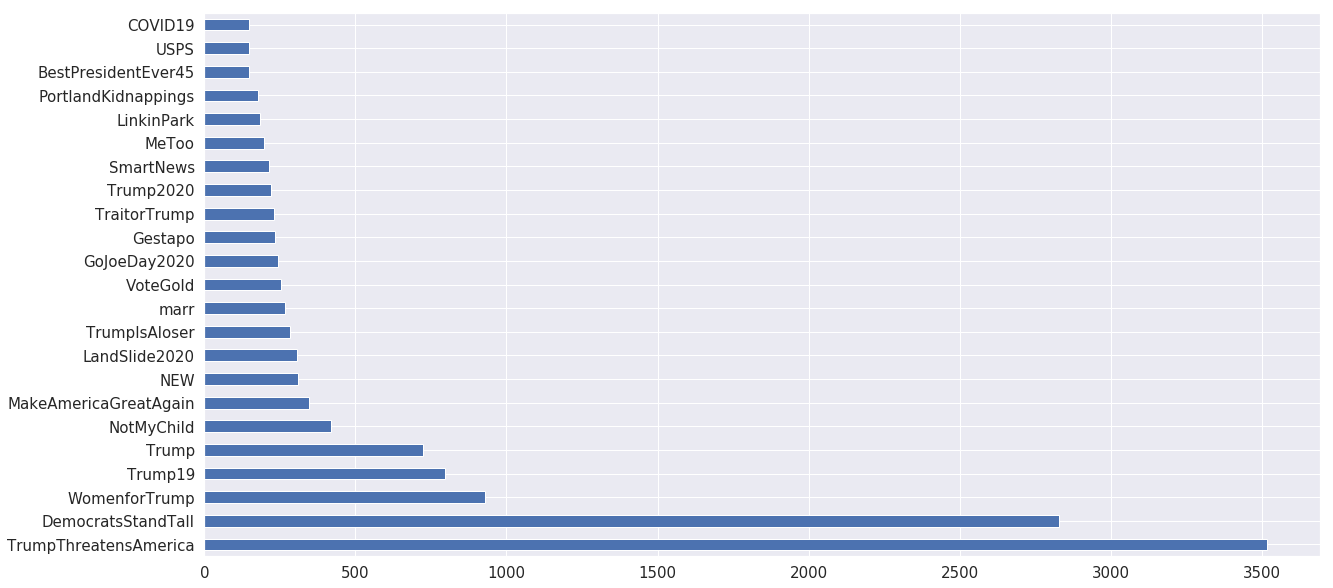

In [6]:
%matplotlib inline
mostUsedHashtag.nlargest(23).plot.barh(fontsize = 15, figsize = (20,10)) #Largest count up to 23

To get a better idea of trending hashtags that mentioned President Trump, we decided to split up the data into 4 time slots; Morning, Noon, Night, Overnight. However, we ran into a problem because the time the tweets were created were given to us in this format:

In [7]:
jsonTime = jsonData.copy()
jsonTime.created_at[0] #First entry's created time/date

u'Sun Jul 19 00:02:11 +0000 2020'

To fix this, we had to clean this column by using the .str.replace() method. Since we have knowledge in regexs already, deleting excess string and converting the column into an int was a breeze. Now the time was in this format:

In [8]:
jsonTime['created_at'] = jsonTime['created_at'].str.replace(r"[a-zA-Z]*\s[a-zA-Z]*\s[0-9]*", "") #Deletes the day and month since it's not needed in this observation
jsonTime['created_at'] = jsonTime['created_at'].str.replace(r"\+(0000)*\s", "") #Deletes +0000, don't know why it's there but recorded time is +7hr from PST
jsonTime['created_at'] = jsonTime['created_at'].str.replace(r"(2020)*", "") #Deletes year since we will always be in 2020 right now
jsonTime['created_at'] = jsonTime['created_at'].str.replace(":", "") #Clean stray colons ( : )
jsonTime['created_at'] = jsonTime['created_at'].astype(int) #Convert to int so we can compare values
jsonTime.created_at[0]

211

However, this format of hh:mm:ss was still 7 hours ahead of our timezone, Pacific Time (PST). To fix this, we had to convert the time. Unfortunately, you cannot simply subtract 7 hours from the time, otherwise you will end up with negative time. This was solved by adding 24 hours, or an additional day, followed by subtracting 7 hours and modding the number by 24 hours again. We were able to end up with the data like this.

In [9]:
#Note that time is formatted in hh:mm:ss (h for hours, m for minutes, s for seconds).
jsonTime['created_at'] = (jsonTime['created_at'] + 240000 - 70000) % 240000 #Add 24hrs then subtract 7hrs then mod by 24hrs so we don't get negative hours when converting to PST
jsonTime.created_at[0]

170211

Finally, we have to split the 4 time slots into their own category. Morning (6am-11am), Noon (11am-2pm), Night (6pm-12am), Overnight (12am-6am).

*Note*: We collected data from 5pm to 1pm the next day. Therefore, we are missing 4hrs of data so there will be a slight bias in the noon section. We apologize for this potential discrepancy.

In [10]:
mornings = jsonTime[(jsonTime['created_at'] >= 130000) & (jsonTime['created_at'] < 180000)]
mornings['estTime'] = "Morning (6am-11am)"

noon = jsonTime[(jsonTime['created_at'] <= 10000) | (jsonTime['created_at'] >= 180000)] #Also takes in whatever is before 6pm since noon was supposed to be around (11am to 5pm)
noon['estTime'] = "Noon (11am-2pm)"

night = jsonTime[(jsonTime['created_at'] < 70000) & (jsonTime['created_at'] > 10000)]
night['estTime'] = "Night (6pm-12am)"

overnight = jsonTime[(jsonTime['created_at'] >= 70000) & (jsonTime['created_at'] < 130000) ]
overnight['estTime'] = "Overnight (12am-6am)"

tempTime = mornings.append(noon).append(night).append(overnight) #Takes soooooo long

Despite the 4 hours missing from Noon, it was the second highest in terms of tweets per time slot. An interesting thing to note is that a lot of people like to stay up overnight just to tweet about Trump. This information seemed intriguing so we looked even deeper into this and here is what it looks like visually:

estTime,Morning (6am-11am),Night (6pm-12am),Noon (11am-2pm),Overnight (12am-6am)
entities.hashtags,33663,68185,96915,169057


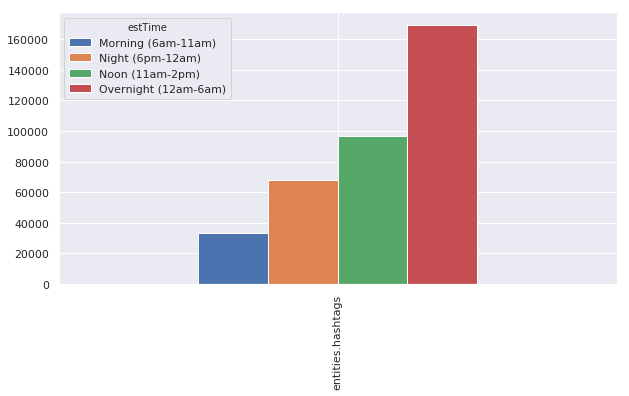

In [11]:
table = pd.pivot_table(tempTime, values = {"entities.hashtags"}, columns = {"estTime"}, aggfunc="count") #No index specified but it works
table.plot.bar(figsize = (10,5))
table

Since each time slot has their own properties, we decided to check up on the top 5 trending hashtags of each time when mentioning Donald Trump. By analyzing each time slot, we are able to see which time of the day certain positive/negative views are displayed for President Trump. We noted our observation under each bar graph and provided some insight to each of the top 5 trending hashtags in each slot below:

*Side note*: We tried using pivot tables to combine the 4 time slots into a single bar graph. However, we would not find the keyword for aggfunc to give us only the top 5 hashtags of each time slot. It was only giving us ALL of the hashtags in each time slot and kept plotting all 24,820 hashtags into a single bar graph. So we decided to just leave them splitted and utilized the .nlargest() function.

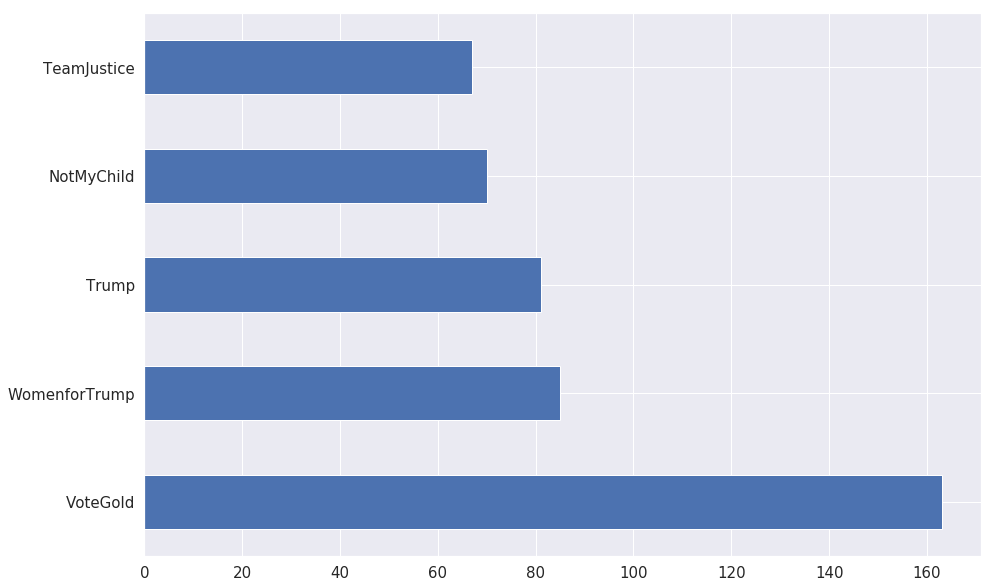

In [12]:
mornings = mornings[mornings['entities.hashtags'] != ""] #Get all hashtags in the morning
mornings['entities.hashtags'].value_counts().nlargest(5).plot.barh(fontsize = 15, figsize = (15,10)) #Morning (6am-11am)

In the morning, **3 out of 5 trending hashtags about Trump were positive**; Those being Trump, WomenforTrump, and VoteGold. Apparently there is a Twitter fan page called "WomenForTrump" that serves as a place for women, who support Trump, to converse.

Only **2 out of 5 trending hashtags were negative** towards Trump in the morning; Those being TeamJustice and NotMyChild. Apparently it looks like the Trump Administration was trying to push for schools to open and parents took it in a negative way.

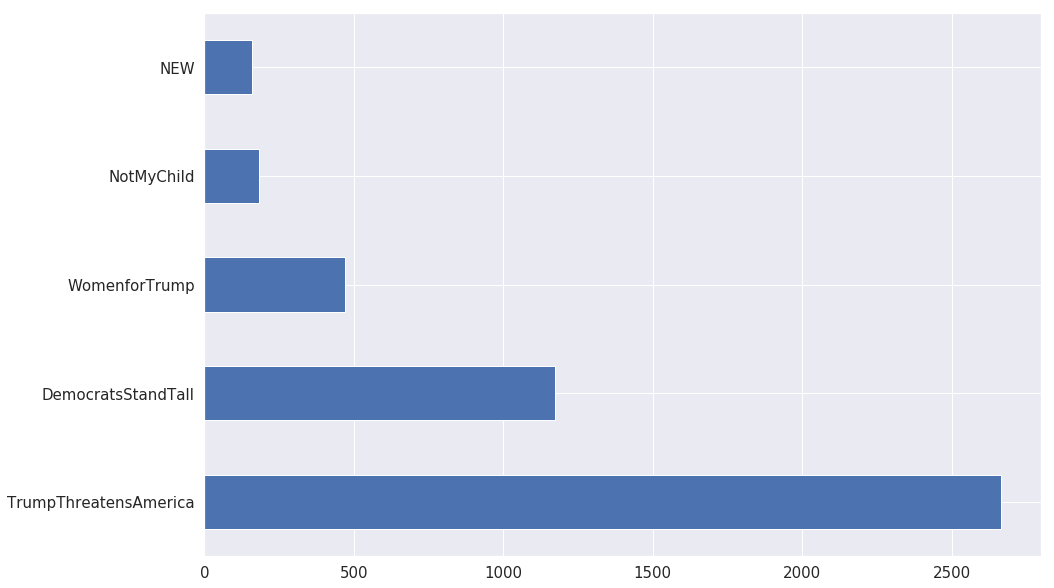

In [13]:
noon = noon[noon['entities.hashtags'] != ""] #Get all hashtags in the noon
noon['entities.hashtags'].value_counts().nlargest(5).plot.barh(fontsize = 15, figsize = (15,10)) #Noon (11am-2pm)

In the noon, only **2 out of 5 trending hashtags about Trump were positive**; Those being NEW and WomenforTrump. Apparently you are supposed to write #NEW to singal that your tweet is new...

**3 out of 5 trending hashtags were negative** towards Trump in the noon; Those being NotMyChild, DemocratsStandTall and TrumpThreatensAmerica. Apparently Twitter thinks Trump in yet again threatening Americans.

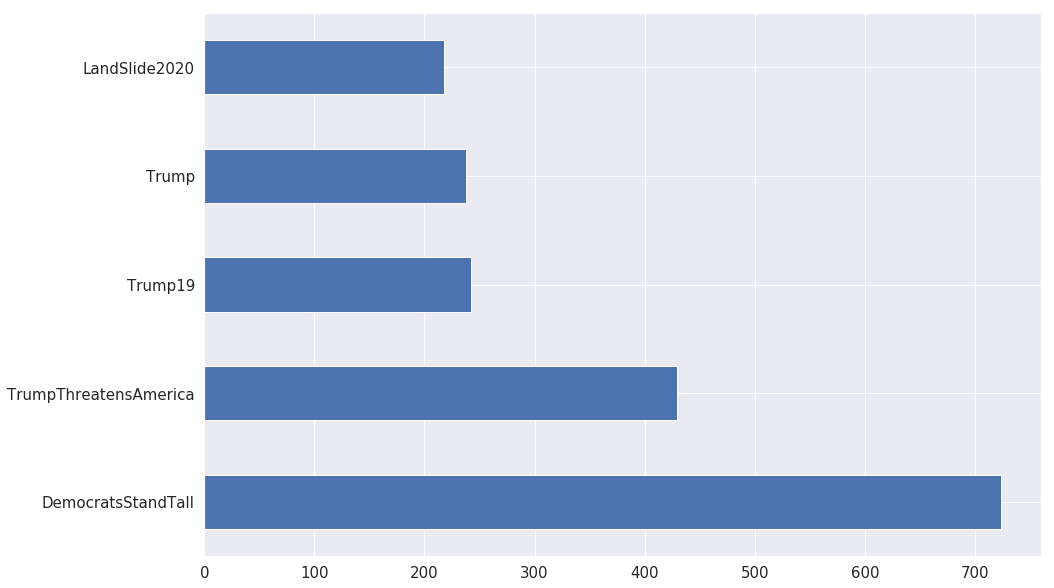

In [14]:
night = night[night['entities.hashtags'] != ""] #Get all hashtags at night
night['entities.hashtags'].value_counts().nlargest(5).plot.barh(fontsize = 15, figsize = (15,10)) #Night (6pm-12am)

At night, only **2 out of 5 trending hashtags about Trump were positive**; Those being LandSlide2020, and Trump. Apparently #LandSlide2020 is talking about Trump's projected presidential votes and not an actual landslide somewhere in the mountains.

**3 out of 5 trending hashtags were negative** towards Trump at night; Those being DemocratsStandTall, TrumpThreatensAmerica and Trump19. Apparently Americans have decided to rename COVID19 to TRUMP19 to show their... love... for how Trump handled the pandemic.

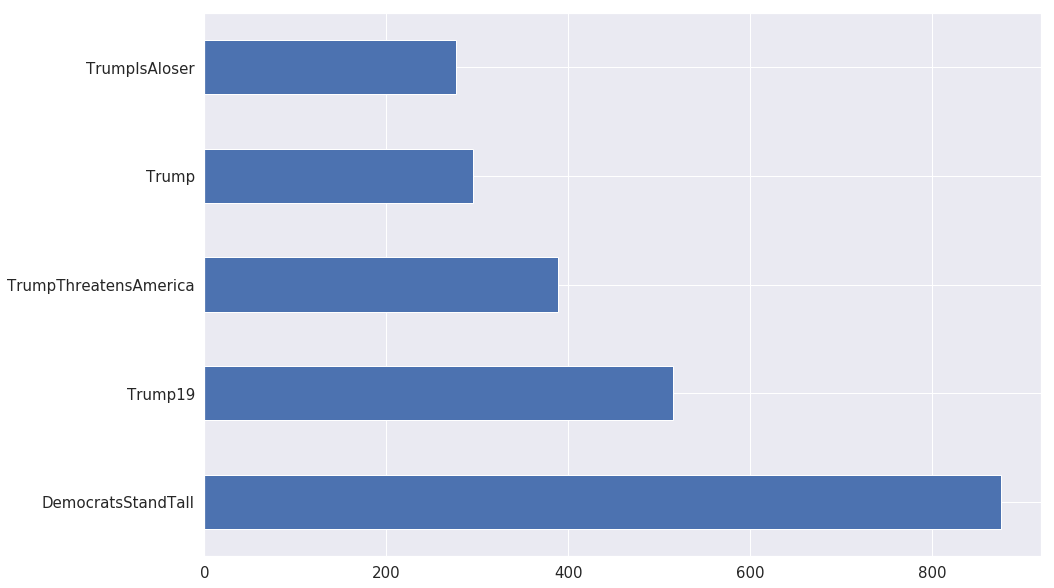

In [15]:
overnight = overnight[overnight['entities.hashtags'] != ""] #Get all hashtags overnight
overnight['entities.hashtags'].value_counts().nlargest(5).plot.barh(fontsize = 15, figsize = (15,10)) #Overnight (12am-6am)

Overnight, only **1 out of 5 trending hashtags about Trump were positive**; Those being just Trump. Apparently putting your name after a hashtag shows support.

**4 out of 5 trending hashtags were negative** towards Trump overnight; Those being DemocratsStandTall TrumpIsAloser, TrumpThreatensAmerica and Trump19. Apparently a lot of democrats like to stay up at night just to call for a Twitter uprising.

We researched this phenomenon to find that the President typically uses Twitter during these hours. This suggests that Twitter users who want to try and get his attention will post late at night when he's around for him to potentially see their tweets.


This thorough analysis supports the idea that the type of trending hashtags that mentions Donald Trump changes throughout the day. Mainstream events that relates to the president directly or indirectly will also affect the outcome of trending Twitter hashtags. It is also interesting to note that the majority of democratic supporters can be found on the west coast, which is probably why night/overnight was dominated by negative comments towards Trump. At the end of the day, you can extrapolate some advice from this analysis; If you are a Republican, it is best to surf Twitter in the morning where a majority of supportive tweets can be found. However, if you are a democrat, you should wait until it is after dark before you speak strongly about President Trump.

## Trump Tweeter Statistics

In this part of the project, we will be conducting a deeper analysis on tweeters who used the keyword "Donald Trump" in their tweets. Statistics like the percentage of verified users, follower counts, languages, geo enablers and status counts will be observed.

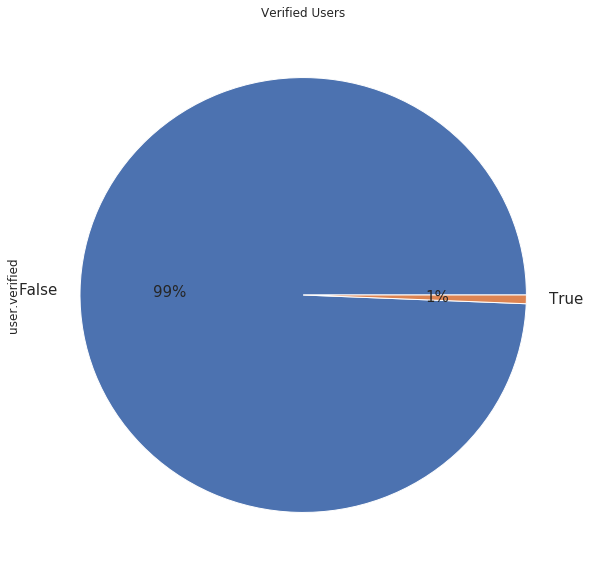

In [16]:
jsonData['user.verified'].value_counts().plot.pie(fontsize = 15, title= "Verified Users", figsize = (10,10), autopct = '%1.0f%%')

We were also interested in viewing the potential amount of people who can see these tweets. While not necessarily accurate to reflect how many people will see the tweet, followers on Twitter give at least an idea as to the potential amount of people these tweets can reach.

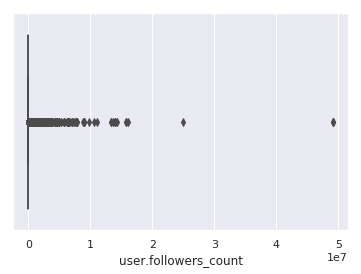

In [17]:
sns.boxplot(x=jsonData["user.followers_count"])

We can also see the most commonly used languages used when tweeting the words "Donald Trump." You can see the majority of the tweets are in English, with the rest being a small percentage.

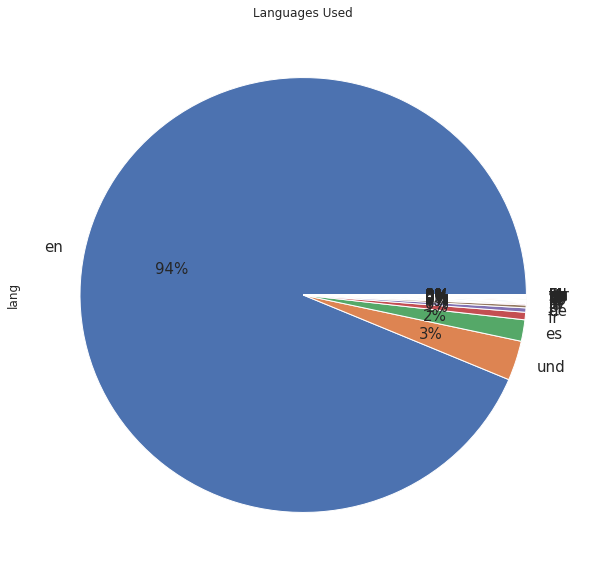

In [18]:
jsonData['lang'].str.replace("en", "English")
jsonData['lang'].str.replace("es", "Spanish")
jsonData['lang'].str.replace("und", "Other")
jsonData['lang'].value_counts().plot.pie(fontsize = 15, title= "Languages Used", figsize = (10,10), autopct = '%1.0f%%')

We can also see whether people tweeting have their geographic location turned on. When enabled, it allows their tweet to show what city, state, and country they posted the tweet from. While we could analyze the locations, it becomes tricky and rather unreliable due to the large amount of spoofing locations via fake IP addresses or VPNs. 

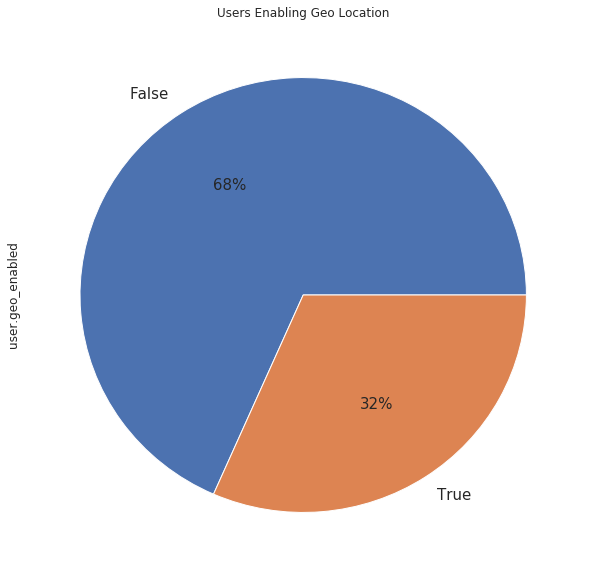

In [19]:
jsonData['user.geo_enabled'].value_counts().plot.pie(fontsize = 15, title= "Users Enabling Geo Location", figsize = (10,10), autopct = '%1.0f%%')

Out of the 68% of people who disabled geo location, about 56% of them ironically decided to put in their location manually as seen from this pie chart. This means that, after totalling 44% of 68%, only **29.92%** of the entire tweeters decided to remain totally anonymous in regards to location.

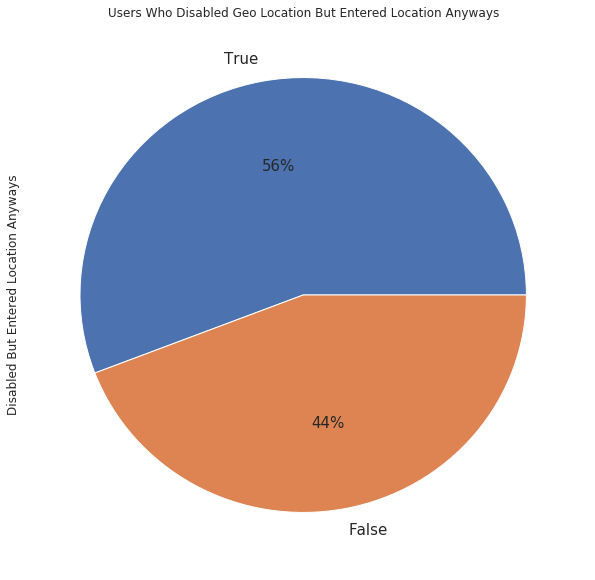

In [20]:
tempGeoLoc = jsonData[(jsonData['user.geo_enabled'] == False)] #Get all rows that disabled geo location
tempGeoLoc['user.location'] = tempGeoLoc['user.location'].astype(unicode) #Some locations contained emojis or non-convertable ascii to str type so unicode is used instead
tempGeoLoc['Disabled But Entered Location Anyways'] = (tempGeoLoc['user.location'] != "None") #Find all locations that are not "None" and write true
tempGeoLoc['Disabled But Entered Location Anyways'].value_counts().plot.pie(fontsize = 15, title= "Users Who Disabled Geo Location But Entered Location Anyways", figsize = (10,10), autopct = '%1.0f%%')

2006 was when Twitter was created. Since then, many people have joined the Twitter. As you can see, the majority of the tweeters who tweet about Trump created their accounts in **2009** or in **2020**. An interesting thing to note is that Donald Trump made his first tweet in [May 2009](https://www.tweetbinder.com/blog/trump-twitter/) so it's not suprising to see many people who tweet at Trump made their accounts then. However, a more interesting key to note is that there is a huge spike of people who made their accounts in **2016-2017**, the year Donald Trump was elected as the president of the United States. From this observation, we can say that a lot of people made their accounts just to tweet at/about Trump on Twitter.

  2009    46309
  2020    41362
  2017    34132
  2011    31585
  2019    30656
  2012    30077
  2016    28521
  2018    24471
  2013    24368
  2010    21804
  2015    21593
  2014    21238
  2008    10075
  2007     1539
  2006       90
Name: user.created_at, dtype: int64

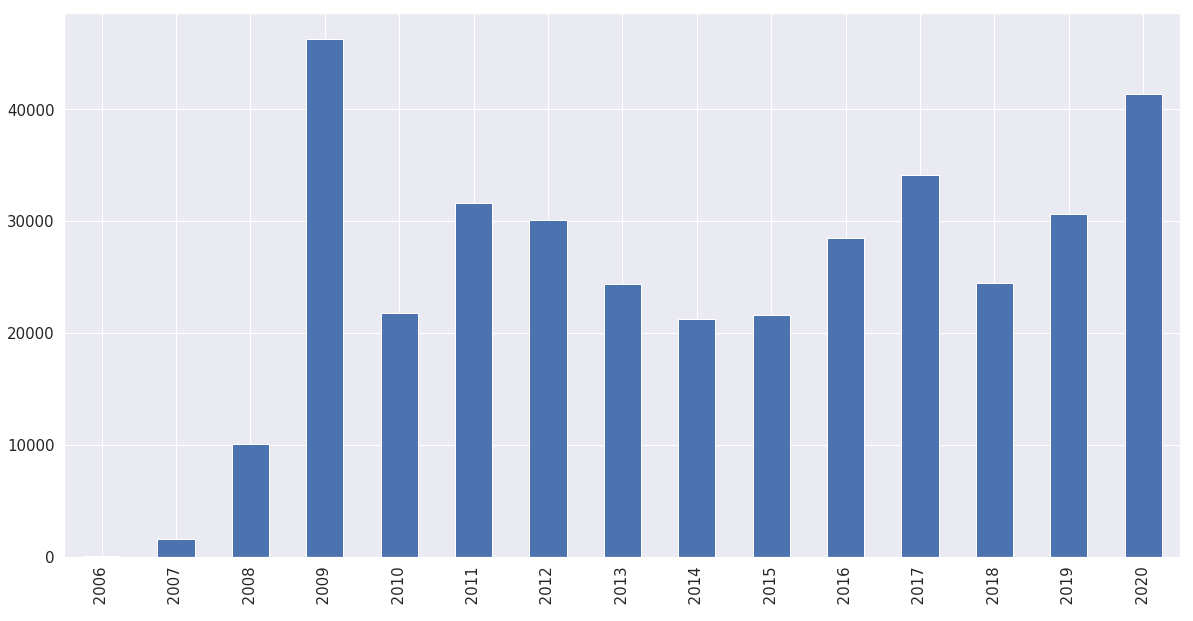

In [21]:
tempUserCreated = jsonData.copy()
tempUserCreated['user.created_at'] = tempUserCreated['user.created_at'].str.replace(r"[a-zA-Z]*\s[a-zA-Z]*\s[0-9]*", "") #Deletes the day and month since it's not needed in this observation
tempUserCreated['user.created_at'] = tempUserCreated['user.created_at'].str.replace(r"\+(0000)*\s", "") #Deletes +0000, don't know why it's there but recorded time is +7hr from PST
tempUserCreated['user.created_at'] = tempUserCreated['user.created_at'].str.replace(r"[0-9]*:[0-9]*:[0-9]*", "") #Removes hh:mm:ss
tempUserCreated['user.created_at'].value_counts().sort_index().plot.bar(fontsize = 15, figsize = (20,10))
tempUserCreated['user.created_at'].value_counts()

Finally, we can see just how many tweets the users tweeting about the President have made overall, suggesting if the users tweeting about Trump are common "tweeters" or more infrequent "tweeters".

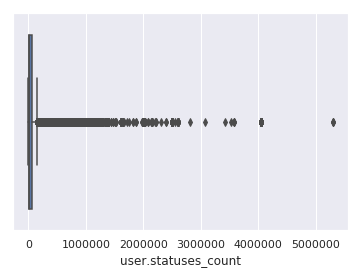

In [22]:
sns.boxplot(x=jsonData["user.statuses_count"])

## Conclusion

From the results above, we have decided our answer on the question about *"Trending Tweets About President Trump Throughout the Day": Do different types of hashtags trend throughout the day depending on real world events relating to Trump?* The answer was simply, yes... but no.. sorta. To further evaluate, our data does suggest that different types of hashtags trend throughout the day and is not overly dominated by one single hashtag. However, we did see some similar trending hashtags throughout the day which suggests that another factor, such as real world events relating to Trump, plays a huge factor in trending tweets about Trump. Despite this observation, we also noticed that during a worldwide pandemic ([COVID-19](https://www.cdc.gov/coronavirus/2019-ncov/index.html)), the hashtag #COVID19 was only ranked 23 which was lower than #LinkinPark, which ranked 19, even though President Trump was at the center of attention for poorly managing the COVID19 outbreak. This happened mainly because of the fact that we gathered data on the same day LinkinPark decided to sue President Trump from using their songs in one of Trump's campaign ad. Overall, trending hashtags that mention Donald Trump are influenced by real world events but are also drastically changing throughout the day depending on the time.

For the question about *"Trump Tweeter Statistics": Are tweeters who mention Donald Trump in their tweets different or similar types of people?* We believe that a vast majority of tweeters mentioning Donald Trump are somewhat similar to each other because of their public information on Twitter. Statistics like the tweeter's follow count tend to be towards the low end, with an exception of a couple of outliers being in the high follow count range. We also noted that about 99% of the people mentioning Donald Trump are not verified users. This only goes to show that many people who tweet about Trump are not known users around the world. On top of all that, we noticed a trend that many people create new Twitter accounts just to tweet at/about Donald Trump.

This project has widened our eyes on how Twitter really works, especially about tweets that mention Donald Trump. Despite our discoveries, we realize that we only just scratched the surface of what Twitter statistics can say about the way mainstream media works. There are many more interesting questions to ask and compelling answers to find, such as the reliability of retweeted status or even the categorization of positive/negative tweets about President Donald J. Trump.